# Importing DermaMNIST dataset

In [1]:
from medmnist import DermaMNIST
dataset_train = DermaMNIST(split="train", download=True)
dataset_test = DermaMNIST(split="test", download=True)
X_test = dataset_test.imgs
y_test = dataset_test.labels

Using downloaded and verified file: C:\Users\cassa\.medmnist\dermamnist.npz
Using downloaded and verified file: C:\Users\cassa\.medmnist\dermamnist.npz


In [2]:
from collections import Counter

train_labels = [label[0] for label in dataset_train.labels]
test_labels = [label[0] for label in dataset_test.labels]

train_class_counts = Counter(train_labels)
test_class_counts = Counter(test_labels)

print("Training Set Class Distribution:")
for class_label, count in train_class_counts.items():
    print(f"Class {class_label} has {count} instances")

print("\nTest Set Class Distribution:")
for class_label, count in test_class_counts.items():
    print(f"Class {class_label} has {count} instances")

Training Set Class Distribution:
Class 0 has 228 instances
Class 5 has 4693 instances
Class 4 has 779 instances
Class 2 has 769 instances
Class 1 has 359 instances
Class 6 has 99 instances
Class 3 has 80 instances

Test Set Class Distribution:
Class 5 has 1341 instances
Class 3 has 23 instances
Class 4 has 223 instances
Class 0 has 66 instances
Class 2 has 220 instances
Class 1 has 103 instances
Class 6 has 29 instances


Text(0.5, 1.0, 'Test dataset: Class #[5]')

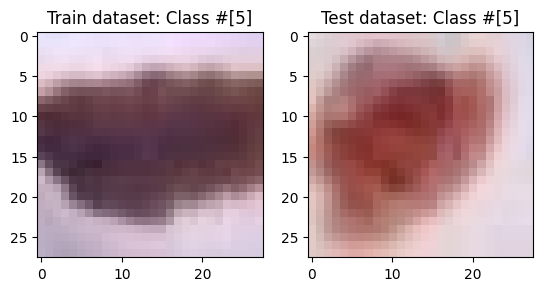

In [3]:
import matplotlib.pyplot as plt

index = 27
plt.subplot(1, 2, 1)
plt.imshow(dataset_train.imgs[index], cmap = "gray")
plt.title(f'Train dataset: Class #{dataset_train.labels[index]}')

plt.subplot(1, 2, 2)
plt.imshow(dataset_test.imgs[index], cmap = "gray")
plt.title(f'Test dataset: Class #{dataset_test.labels[index]}')

# Image pre-processing

### SMOTE for data balancing

In [4]:
##Flattening images to a 2d array so I can use it in SMOTE
n_samples, height, width, n_channels = dataset_train.imgs.shape
dataset_train_flat = dataset_train.imgs.reshape(n_samples, -1)

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42, k_neighbors=10)

X_train_resampled, y_train = smote.fit_resample(dataset_train_flat, dataset_train.labels)

In [6]:
#Reshaping the dataset to its original shape
X_train = X_train_resampled.reshape(-1, height, width, n_channels)
X_train.shape

(32851, 28, 28, 3)

In [7]:
import numpy as np

X_train_labels, counts = np.unique(y_train, return_counts=True)

for class_label, count in zip(X_train_labels, counts):
    print(f"Class {class_label} has {count} instances")


Class 0 has 4693 instances
Class 1 has 4693 instances
Class 2 has 4693 instances
Class 3 has 4693 instances
Class 4 has 4693 instances
Class 5 has 4693 instances
Class 6 has 4693 instances


In [8]:
import numpy as np

print("Original class distribution:", dict(zip(*np.unique(dataset_train.labels, return_counts=True))))
print("Resampled class distribution:", dict(zip(*np.unique(y_train, return_counts=True))))

Original class distribution: {np.uint8(0): np.int64(228), np.uint8(1): np.int64(359), np.uint8(2): np.int64(769), np.uint8(3): np.int64(80), np.uint8(4): np.int64(779), np.uint8(5): np.int64(4693), np.uint8(6): np.int64(99)}
Resampled class distribution: {np.uint8(0): np.int64(4693), np.uint8(1): np.int64(4693), np.uint8(2): np.int64(4693), np.uint8(3): np.int64(4693), np.uint8(4): np.int64(4693), np.uint8(5): np.int64(4693), np.uint8(6): np.int64(4693)}


Text(0.5, 1.0, '5')

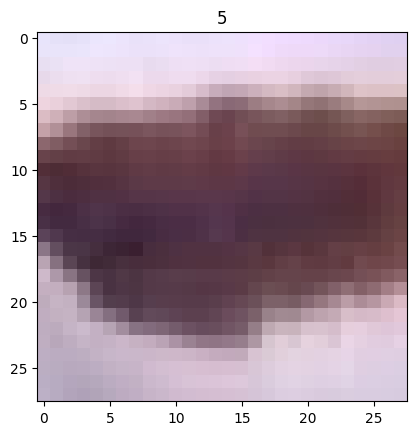

In [9]:
import matplotlib.pyplot as plt

index = 27
plt.imshow(X_train[index], cmap = "gray")
plt.title(y_train[index])

### Grayscale: Converting color images to grayscale to simplify the image data and reduce computational needs. 

In [ ]:
import skimage as ski
import numpy as np

X_train_gray = []
X_test_gray = []

for img in X_train:
    gray_img = ski.color.rgb2gray(img)
    X_train_gray.append(gray_img)

for img in X_test:
    gray_img = ski.color.rgb2gray(img)
    X_test_gray.append(gray_img)

X_train_gray = np.array(X_train_gray)
X_test_gray = np.array(X_test_gray)

In [11]:
X_train_gray.shape

(32851, 28, 28)

Text(0.5, 1.0, 'Test dataset: Class #[5]')

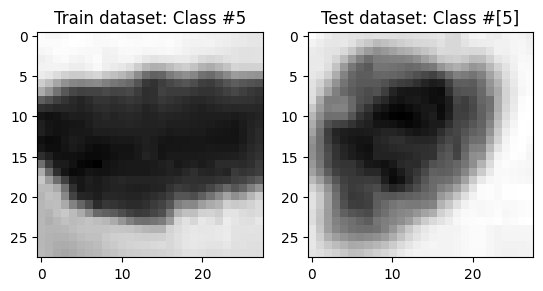

In [12]:
#Plotting the new images
index = 27

plt.subplot(1, 2, 1)
plt.imshow(X_train_gray[index], cmap = 'gray')
plt.title(f'Train dataset: Class #{y_train[index]}')

plt.subplot(1, 2, 2)
plt.imshow(X_test_gray[index], cmap = 'gray')
plt.title(f'Test dataset: Class #{y_test[index]}')

## Noise reduction

### For smoothing

In [13]:
X_train_gray_blurred = []
X_test_gray_blurred = []

for img in X_train_gray:
    X_train_gray_blurred.append(ski.filters.gaussian(img, sigma=(1,1), truncate=3.5))

for img in X_test_gray:
    X_test_gray_blurred.append(ski.filters.gaussian(img, sigma=(1,1), truncate=3.5))


Text(0.5, 1.0, 'Test dataset: Class #[5]')

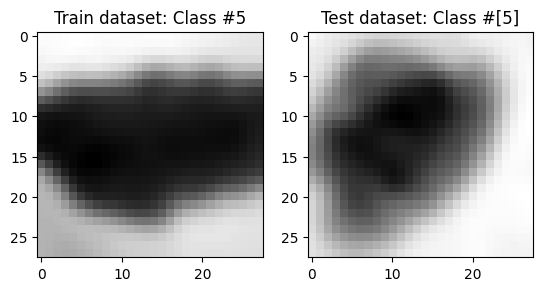

In [14]:
index = 27
plt.subplot(1, 2, 1)
plt.imshow(X_train_gray_blurred[index], cmap = 'gray')
plt.title(f'Train dataset: Class #{y_train[index]}')

plt.subplot(1, 2, 2)
plt.imshow(X_test_gray_blurred[index], cmap = 'gray')
plt.title(f'Test dataset: Class #{y_test[index]}')

### For sharpening

In [15]:
X_train_gray_sharpened = []
X_test_gray_sharpened = []

for img in X_train_gray:
    X_train_gray_sharpened.append(ski.filters.unsharp_mask(img, radius = 5.0, amount = 2))

for img in X_test_gray:
    X_test_gray_sharpened.append(ski.filters.unsharp_mask(img, radius = 5.0, amount = 2))

X_train_gray_sharpened = np.array(X_train_gray_sharpened)
X_test_gray_sharpened = np.array(X_test_gray_sharpened)

Text(0.5, 1.0, 'Test dataset: Class #[5]')

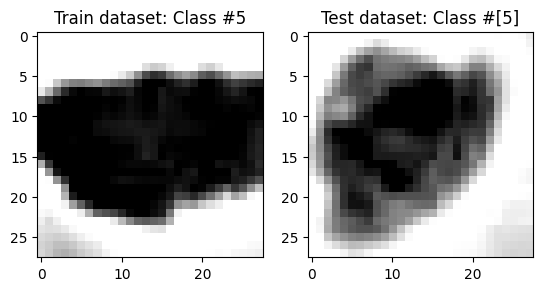

In [16]:
index = 27
plt.subplot(1, 2, 1)
plt.imshow(X_train_gray_sharpened[index], cmap = 'gray')
plt.title(f'Train dataset: Class #{y_train[index]}')

plt.subplot(1, 2, 2)
plt.imshow(X_test_gray_sharpened[index], cmap = 'gray')
plt.title(f'Test dataset: Class #{y_test[index]}')

### Histogram equalization to improve image contrast

In [17]:
X_train_gray_sharpened = np.array(X_train_gray_sharpened)
X_train_gray_sharpened_eq = ski.exposure.equalize_hist(X_train_gray_sharpened)

X_test_gray_sharpened = np.array(X_test_gray_sharpened)
X_test_gray_sharpened_eq = ski.exposure.equalize_hist(X_test_gray_sharpened)

Text(0.5, 1.0, 'Test dataset: Class #[5]')

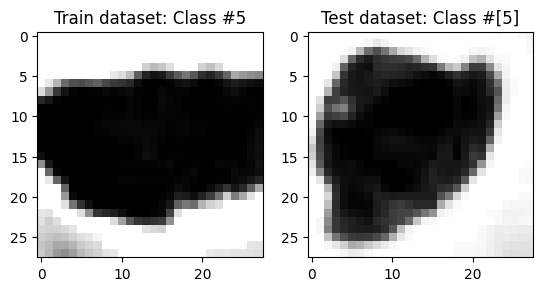

In [18]:
index = 27
plt.subplot(1, 2, 1)
plt.imshow(X_train_gray_sharpened_eq[index], cmap = 'gray')
plt.title(f'Train dataset: Class #{y_train[index]}')

plt.subplot(1, 2, 2)
plt.imshow(X_test_gray_sharpened_eq[index], cmap = 'gray')
plt.title(f'Test dataset: Class #{y_test[index]}')

### Edge detection using Canny

In [19]:
X_train_gray_sharpened_canny = [ski.feature.canny(image, sigma=0.2) for image in X_train_gray_sharpened]

X_test_gray_sharpened_canny = [ski.feature.canny(image, sigma=0.2) for image in X_test_gray_sharpened]

X_train_gray_sharpened_canny = np.array(X_train_gray_sharpened_canny)
X_test_gray_sharpened_canny = np.array(X_test_gray_sharpened_canny)

Text(0.5, 1.0, 'Test dataset: Class #[5]')

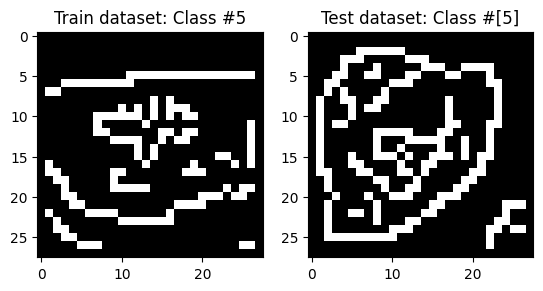

In [20]:
index = 27
plt.subplot(1, 2, 1)
plt.imshow(X_train_gray_sharpened_canny[index], cmap = 'gray')
plt.title(f'Train dataset: Class #{y_train[index]}')

plt.subplot(1, 2, 2)
plt.imshow(X_test_gray_sharpened_canny[index], cmap = 'gray')
plt.title(f'Test dataset: Class #{y_test[index]}')

### Pipeline to use normalizer and standarscaler

In [51]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('normalizer', Normalizer(norm='l2'))
])

num_images_train = X_train_gray_sharpened.shape[0]
num_images_test = X_test_gray_sharpened.shape[0]

normalized_image_flatten_train = X_train_gray_sharpened.reshape(num_images_train, -1)
normalized_image_flatten_test = X_test_gray_sharpened.reshape(num_images_test, -1)


X_transformed_train = pipeline.fit_transform(normalized_image_flatten_train)
X_transformed_test = pipeline.transform(normalized_image_flatten_test)


Text(0.5, 1.0, 'Train dataset: Class #[5]')

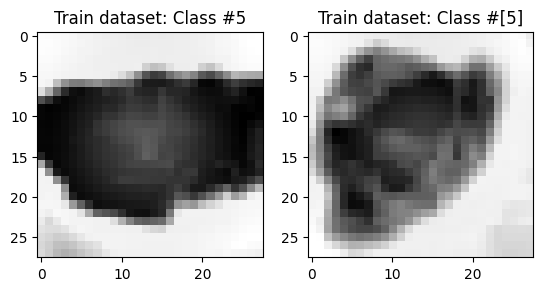

In [22]:
n_samples_train, height_train, width_train = X_train_gray_sharpened.shape
X_transformed_train_reshaped = X_transformed_train.reshape(-1, height_train, width_train)

n_samples_test, height_test, width_test = X_test_gray_sharpened.shape
X_transformed_test_reshaped = X_transformed_test.reshape(-1, height_test, width_test)

index = 27
plt.subplot(1, 2, 1)
plt.imshow(X_transformed_train_reshaped[index], cmap = 'gray')
plt.title(f'Train dataset: Class #{y_train[index]}')

plt.subplot(1, 2, 2)
plt.imshow(X_transformed_test_reshaped[index], cmap = 'gray')
plt.title(f'Train dataset: Class #{y_test[index]}')

### Pipeline to use normalizer and MinMaxScaler

In [23]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('normalizer', Normalizer(norm='l2')),
    ('scaler', MinMaxScaler())
])

num_images_train = X_train_gray.shape[0]
num_images_test = X_test_gray.shape[0]

normalized_image_flatten_train = X_train_gray.reshape(num_images_train, -1)
normalized_image_flatten_test = X_test_gray.reshape(num_images_test, -1)


X_transformed_train = pipeline.fit_transform(normalized_image_flatten_train)
X_transformed_test = pipeline.transform(normalized_image_flatten_test)

### PCA

In [52]:
from sklearn.decomposition import PCA

pca_n_components = 50

pca = PCA(n_components = pca_n_components)
X_train_pca = pca.fit_transform(X_transformed_train)
X_test_pca = pca.transform(X_transformed_test)

### UMAP

In [477]:
import umap

umap_reducer = umap.UMAP(n_components=3, random_state=42, n_neighbors=100, min_dist=0.1, n_jobs=-1)
X_train_umap = umap_reducer.fit_transform(X_train_pca)
X_test_umap = umap_reducer.transform(X_test_pca)

c:\Users\cassa\miniconda3\envs\iteso2024\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


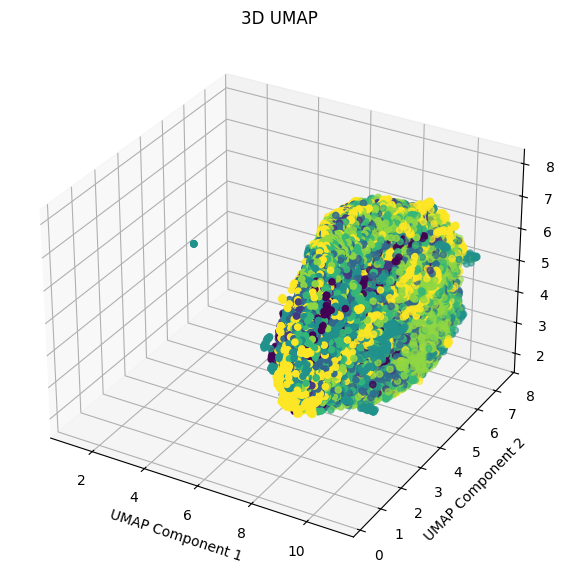

In [478]:
fig = plt.figure(figsize=(7, 7))
plot = fig.add_subplot(111, projection='3d')
plot_scatter = plot.scatter(X_train_umap[:, 0], X_train_umap[:, 1], X_train_umap[:, 2], c = y_train)
plot.set_title("3D UMAP")
plot.set_xlabel("UMAP Component 1")
plot.set_ylabel("UMAP Component 2")
plot.set_zlabel("UMAP Component 3")

plt.show()

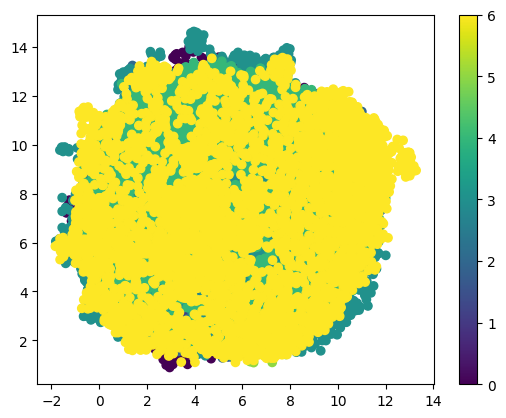

In [455]:
import matplotlib.pyplot as plt

plt.scatter(X_train_umap[:, 0], X_train_umap[:, 1], c = y_train)
plt.colorbar()

# gridsearch

In [132]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

In [70]:
from sklearn.decomposition import PCA

num_images = normalized_image.shape[0]
normalized_image_flatten = normalized_image_sk_norm.reshape(num_images, -1)
pca = PCA()

### Gridsearch for SGDClassifier

In [143]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier

k_range = list(range(1, 31))
pca_range = list(range(1, 20))

pipeline_knn = Pipeline(steps=[
    ('pca', PCA()),
    ('knn', KNeighborsClassifier())    
])

pipeline_sgd = Pipeline(steps=[
    #('pca', PCA()),
    ('sgd', SGDClassifier())
])

#param_grid = dict(n_neighbors=k_range, weights = ['uniform', 'distance'], metric  = ['euclidean', 'manhattan'])
#param_grid = dict(pca__n_components = pca_range, knn__n_neighbors=k_range)
param_grid = dict(#pca__n_components = pca_range, 
                sgd__loss = ['log_loss'],
                sgd__alpha = [0.1],
                sgd__max_iter = [1800, 2200, 2600])

gridsearch = GridSearchCV(pipeline_sgd, param_grid, cv=10, scoring='accuracy', return_train_score=False)

gridsearch.fit(normalized_image_flatten, y_train)

GridSearchCV(cv=10, estimator=Pipeline(steps=[('sgd', SGDClassifier())]),
             param_grid={'sgd__alpha': [0.1], 'sgd__loss': ['log_loss'],
                         'sgd__max_iter': [1800, 2200, 2600]},
             scoring='accuracy')

In [144]:
print("Best parameters:", gridsearch.best_params_)
print("Best cross-validation accuracy:", gridsearch.best_score_)

Best parameters: {'sgd__alpha': 0.1, 'sgd__loss': 'log_loss', 'sgd__max_iter': 1800}
Best cross-validation accuracy: 0.29396318128381926


### Gridsearch for KNeighborsClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier

k_range = list(range(1, 15))
pca_range = list(range(1, 20))

pipeline_knn = Pipeline(steps=[
    ('pca', PCA()),
    ('knn', KNeighborsClassifier())    
])

pipeline_sgd = Pipeline(steps=[
    ('pca', PCA()),
    ('sgd', SGDClassifier())
])

#param_grid = dict(n_neighbors=k_range, weights = ['uniform', 'distance'], metric  = ['euclidean', 'manhattan'])
param_grid = dict(pca__n_components = pca_range, knn__n_neighbors=k_range, knn__weights=['distance'])
#param_grid = dict(pca__n_components = pca_range, sgd__loss = ['hinge', 'log'], sgd__alpha = [0.01, 0.1], sgd__max_iter = [1800, 2200, 2600])

gridsearch = GridSearchCV(pipeline_knn, param_grid, cv=5, scoring='accuracy', return_train_score=False)

gridsearch.fit(normalized_image_flatten, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pca', PCA()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14],
                         'knn__weights': ['distance'],
                         'pca__n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                               11, 12, 13, 14, 15, 16, 17, 18,
                                               19]},
             scoring='accuracy')

In [58]:
print("Best parameters:", gridsearch.best_params_)
print("Best cross-validation accuracy:", gridsearch.best_score_)

Best parameters: {'knn__n_neighbors': 1, 'pca__n_components': 19}
Best cross-validation accuracy: 0.6891105723293648


### Gridsearch for SVC

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.decomposition import PCA

pca_range = [10, 20, 30, 40, 50]
C_list = [0.1, 0.5, 1, 5, 10]

pipeline_svc = Pipeline(steps=[
    ('pca', PCA()),
    ('svc', SVC()) 
])


param_grid = dict(svc__kernel = ['rbf'],
                  pca__n_components = pca_range,
                  svc__random_state = [42],
                  svc__C=C_list)


gridsearch = GridSearchCV(pipeline_svc, param_grid, cv=5, return_train_score=False)

gridsearch.fit(X_transformed_train, y_train)

c:\Users\cassa\miniconda3\envs\iteso2024\lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=Pipeline(steps=[('pca', PCA()), ('svc', SVC())]),
             param_grid={'pca__n_components': [10, 20, 30, 40, 50],
                         'svc__C': [0.1, 0.5, 1, 5, 10], 'svc__kernel': ['rbf'],
                         'svc__random_state': [42]})

In [24]:
print("Best parameters:", gridsearch.best_params_)
print("Best cross-validation accuracy:", gridsearch.best_score_)

Best parameters: {'pca__n_components': 50, 'svc__C': 10, 'svc__kernel': 'rbf', 'svc__random_state': 42}
Best cross-validation accuracy: 0.7920301949412424


# Training the model

### SGDClassifier

In [53]:
from sklearn.linear_model import SGDClassifier

n_iterations = 50000

sgd = SGDClassifier(penalty='l2', 
                    alpha=0.5,
                    n_jobs=-1,
                    max_iter=n_iterations, eta0=0.1)

sgd.fit(X_train_pca, y_train)

SGDClassifier(alpha=0.5, eta0=0.1, max_iter=50000, n_jobs=-1)

In [54]:
from sklearn.metrics import accuracy_score

y_pred_sgd = sgd.predict(X_train_pca)

print(f"Acc is {accuracy_score(y_train, y_pred_sgd)}")

Acc is 0.2430367416517001


### KNN

In [55]:
from sklearn.neighbors import KNeighborsClassifier

k = 1000

knn = KNeighborsClassifier(n_neighbors = k, weights='distance', n_jobs=-1)
knn.fit(X_train_pca, y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=1000, weights='distance')

In [56]:
from sklearn.metrics import accuracy_score

y_pred_knn = knn.predict(X_train_pca)

print(f"Acc is {accuracy_score(y_train, y_pred_knn)}")

Acc is 1.0


### SVC

In [57]:
from sklearn.svm import SVC

svc = SVC(kernel='rbf', C = 1, random_state=42)
svc.fit(X_train_pca, y_train)

SVC(C=1, random_state=42)

In [58]:
from sklearn.metrics import accuracy_score

y_pred_svc = svc.predict(X_train_pca)

print(f"Acc is {accuracy_score(y_train, y_pred_svc)}")

Acc is 0.8162917414994977


### Random forest

In [59]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=1000, max_depth=10, n_jobs = -1, random_state=42)

# Train the model
rf.fit(X_train_pca, y_train)

RandomForestClassifier(max_depth=10, n_estimators=1000, n_jobs=-1,
                       random_state=42)

In [60]:
from sklearn.metrics import accuracy_score

y_pred_rf = rf.predict(X_train_pca)

print(f"Acc is {accuracy_score(y_train, y_pred_rf)}")

Acc is 0.7038141913488174


# Testing

### Prediction

### KNN

In [61]:
from sklearn.metrics import accuracy_score

pred_y_knn = knn.predict(X_test_pca)

print(f"Acc at K={k} is {accuracy_score(y_test, pred_y_knn)}")

Acc at K=1000 is 0.5755610972568579


### SGD

In [62]:
from sklearn.metrics import accuracy_score

pred_y_sgd = sgd.predict(X_test_pca)

print(f"Acc is {accuracy_score(y_test, pred_y_sgd)}")

Acc is 0.4199501246882793


### SVC

In [63]:
pred_y_svc = svc.predict(X_test_pca)
print(f"Acc is {accuracy_score(y_test, pred_y_svc)}")

Acc is 0.6802992518703241


### Random forest

In [64]:
pred_y_rf = rf.predict(X_test_pca)
print(f"Acc is {accuracy_score(y_test, pred_y_rf)}")

Acc is 0.6049875311720698


# Results visualization (confusion matrix)

### For SVC

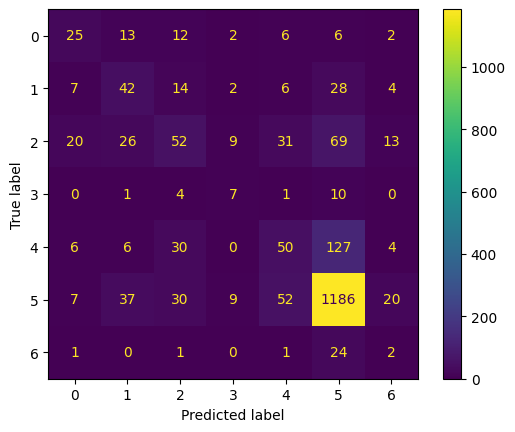

In [65]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, pred_y_svc)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [66]:
from sklearn.metrics import classification_report

report = classification_report(y_test, pred_y_svc)
print(report)

              precision    recall  f1-score   support

           0       0.38      0.38      0.38        66
           1       0.34      0.41      0.37       103
           2       0.36      0.24      0.29       220
           3       0.24      0.30      0.27        23
           4       0.34      0.22      0.27       223
           5       0.82      0.88      0.85      1341
           6       0.04      0.07      0.05        29

    accuracy                           0.68      2005
   macro avg       0.36      0.36      0.35      2005
weighted avg       0.66      0.68      0.67      2005



### For SGDClassificator

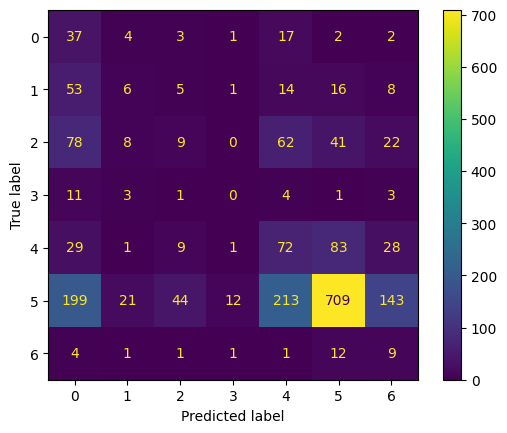

In [67]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, pred_y_sgd)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [68]:
from sklearn.metrics import classification_report

report = classification_report(y_test, pred_y_sgd)
print(report)

              precision    recall  f1-score   support

           0       0.09      0.56      0.16        66
           1       0.14      0.06      0.08       103
           2       0.12      0.04      0.06       220
           3       0.00      0.00      0.00        23
           4       0.19      0.32      0.24       223
           5       0.82      0.53      0.64      1341
           6       0.04      0.31      0.07        29

    accuracy                           0.42      2005
   macro avg       0.20      0.26      0.18      2005
weighted avg       0.59      0.42      0.47      2005



### For KNeighborsClassificator

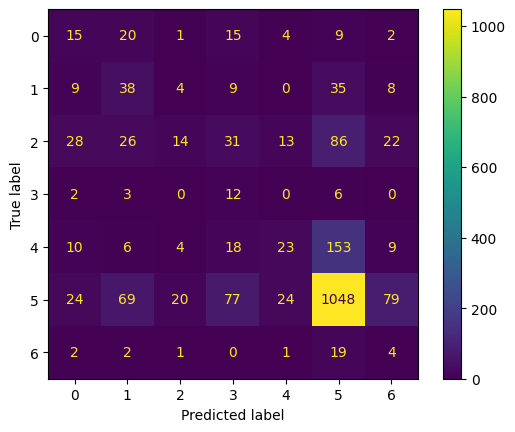

In [69]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, pred_y_knn)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [70]:
from sklearn.metrics import classification_report

report = classification_report(y_test, pred_y_knn)
print(report)

              precision    recall  f1-score   support

           0       0.17      0.23      0.19        66
           1       0.23      0.37      0.28       103
           2       0.32      0.06      0.11       220
           3       0.07      0.52      0.13        23
           4       0.35      0.10      0.16       223
           5       0.77      0.78      0.78      1341
           6       0.03      0.14      0.05        29

    accuracy                           0.58      2005
   macro avg       0.28      0.31      0.24      2005
weighted avg       0.61      0.58      0.57      2005



### For Random Forest

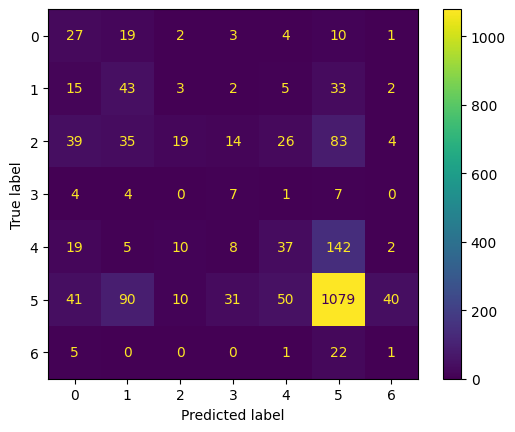

In [71]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, pred_y_rf)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [72]:
from sklearn.metrics import classification_report

report = classification_report(y_test, pred_y_rf)
print(report)

              precision    recall  f1-score   support

           0       0.18      0.41      0.25        66
           1       0.22      0.42      0.29       103
           2       0.43      0.09      0.14       220
           3       0.11      0.30      0.16        23
           4       0.30      0.17      0.21       223
           5       0.78      0.80      0.79      1341
           6       0.02      0.03      0.03        29

    accuracy                           0.60      2005
   macro avg       0.29      0.32      0.27      2005
weighted avg       0.62      0.60      0.60      2005



In [73]:
dataset_test.info

{'python_class': 'DermaMNIST',
 'description': 'The DermaMNIST is based on the HAM10000, a large collection of multi-source dermatoscopic images of common pigmented skin lesions. The dataset consists of 10,015 dermatoscopic images categorized as 7 different diseases, formulized as a multi-class classification task. We split the images into training, validation and test set with a ratio of 7:1:2. The source images of 3×600×450 are resized into 3×28×28.',
 'url': 'https://zenodo.org/records/10519652/files/dermamnist.npz?download=1',
 'MD5': '0744692d530f8e62ec473284d019b0c7',
 'url_64': 'https://zenodo.org/records/10519652/files/dermamnist_64.npz?download=1',
 'MD5_64': 'b70a2f5635c6199aeaa28c31d7202e1f',
 'url_128': 'https://zenodo.org/records/10519652/files/dermamnist_128.npz?download=1',
 'MD5_128': '2defd784463fa5243564e855ed717de1',
 'url_224': 'https://zenodo.org/records/10519652/files/dermamnist_224.npz?download=1',
 'MD5_224': '8974907d8e169bef5f5b96bc506ae45d',
 'task': 'multi-c